In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [2]:
df= pd.read_csv("indihome_dataset_bersih.csv")
data = df.drop ('Unnamed: 0',axis=1)
data.head()

,tweet,label
0,internet cepat nya hoax ya indihome useetv kam...,0
1,lemot gini,0
2,penanganan udah hari berturut telpon bilangnya...,0
3,akhir pas hujan malem error yaa,0
4,ya routernya nyala ssid nya gaada plis sejam k...,0


In [21]:
df_pos = data.loc[data['label'] == 1]
df_neg = data.loc[data['label'] == 0]

print("Positif : ", len(df_pos))
print("Negatif : ", len(df_neg))

Positif :  544
Negatif :  901


In [31]:
df_data = df[["tweet","label"]]

In [34]:
df_data.columns

Index(['tweet', 'label'], dtype='object')

In [35]:
df_x=df_data["tweet"]
df_y=df_data["label"]

In [37]:
df_x=df_x.astype("str")

In [38]:
corpus = df_x
cv = CountVectorizer()
X = cv.fit_transform(corpus) # Fit the Data

In [27]:
# x=df_x.astype("str")

In [39]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
cv.get_feature_names()

['abdi',
 'abis',
 'access',
 'ad',
 'adain',
 'adakah',
 'adaninternet',
 'add',
 'addonnya',
 'adek',
 'admin',
 'adminn',
 'aduannya',
 'aduh',
 'aduhhh',
 'afriantii',
 'again',
 'agan',
 'agentny',
 'agung',
 'agus',
 'ah',
 'ahhh',
 'ai',
 'aing',
 'aj',
 'aja',
 'ak',
 'akbar',
 'akhir',
 'akhlak',
 'akibat',
 'akses',
 'aksi',
 'aktif',
 'aktifasi',
 'aktifin',
 'aktifkan',
 'aktifkannya',
 'akun',
 'akutu',
 'al',
 'alah',
 'alamat',
 'alami',
 'alasan',
 'alhamdulilah',
 'alhamdulillah',
 'aliakbar',
 'alias',
 'all',
 'allah',
 'allchannel',
 'alnov',
 'ama',
 'aman',
 'ambil',
 'ambyaaaaarrrrr',
 'amin',
 'aminyaallah',
 'amp',
 'ampas',
 'ampe',
 'amponnnnnn',
 'ampun',
 'an',
 'anak',
 'anaknya',
 'ancur',
 'ane',
 'aneh',
 'anggak',
 'angin',
 'anjeng',
 'anjir',
 'apaka',
 'apasi',
 'apgreed',
 'aplikasi',
 'app',
 'apps',
 'apresiasi',
 'aqua',
 'arahan',
 'ardhan',
 'area',
 'asa',
 'asal',
 'aseli',
 'ashiaapp',
 'ashooooy',
 'asik',
 'asli',
 'astaaaaaaaaaaagaaaaaaa

In [11]:
b=vectorizer.get_feature_names()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.20, random_state=0)

In [42]:
X_train
# X_train.shape, y_train.shape
# X_test.shape, y_test.shape

<1156x2664 sparse matrix of type '<class 'numpy.int64'>'
	with 7931 stored elements in Compressed Sparse Row format>

In [48]:
classifierSVM = SVC (kernel ='linear', random_state = 0, probability=True)
classifierSVM.fit (X_train, y_train)
classifierSVM.score (X_test,y_test)

0.8477508650519031

In [51]:
# Accuracy of our Model
print("Accuracy of Model",classifierSVM.score(X_test,y_test)*100,"%")

Accuracy of Model 84.77508650519032 %


In [49]:
classifierSVM_pred = classifierSVM.predict(X_test)

In [50]:
classifierSVM_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [53]:
import pickle

In [61]:
svmML = open("indihome.pkl","wb")

In [62]:
pickle.dump(classifierSVM,svmML)

In [63]:
svmML.close()

In [64]:
model = open("indihome.pkl","rb")

In [65]:
new_model = pickle.load(model)

In [66]:
new_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [73]:
# Sample Prediciton 3
comment2 = ["lemot banget jaringan"]
vect = cv.transform(comment2).toarray()
new_model.predict(vect)

array([0], dtype=int64)

In [75]:
if new_model.predict(vect) == 0:
    print("negatif")
else:
    print("positif")

negatif


In [24]:
np.savetxt('prediksi_indihome.csv',classifierSVM_pred,delimiter=',')

In [25]:
data = np.genfromtxt('prediksi_indihome.csv', delimiter=',')

In [26]:
col_Names=["label"]
data = pd.read_csv("prediksi_indihome.csv",names=col_Names)

In [27]:
data = data.astype("int")

In [28]:
data.head()

,label
0,0
1,0
2,1
3,1
4,0


In [29]:
data_pos = data.loc[data["label"]== 1]
data_neg = data.loc[data["label"]== 0]

print("Positif : ", len(data_pos))
print("Negatif : ", len(data_neg))

Positif :  84
Negatif :  205


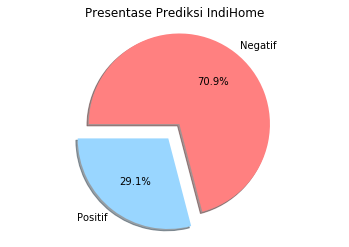

In [30]:
labels = 'Positif', 'Negatif'
sizes = [len(data_pos), len(data_neg)] #nilai masing masing kategori
colors = ["#99d6ff","#ff8080"]
explode = (0.2,0) # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle = 180) #autopct = %1.1f% artinya nilainya float satu angka dibelakang koma
plt.axis('equal')
plt.title('Presentase Prediksi IndiHome')
plt.show()

In [31]:
for i in range(0,289):
    print("Sebenarnya=%s, Prediksi=%s" % (df_y[i], classifierSVM_pred[i]))

Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=1
Sebenarnya=0, Prediksi=1
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=1, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=1
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=1
Sebenarnya=0, Prediksi=1
Sebenarnya=0, Prediksi=1
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=1
Sebenarnya=0, Prediksi=0
Sebenarnya=1, Prediksi=1
Sebenarnya=1, Prediksi=1
Sebenarnya=0, Prediksi=1
Sebenarnya=1, Prediksi=1
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=1
Sebenarnya=0, Prediksi=1
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=0, Prediksi=0
Sebenarnya=1, Prediksi=1
Sebenarnya=0, Prediksi=0


In [32]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, classifierSVM_pred))

0.8615916955017301


In [33]:
cmSVM = confusion_matrix(y_test,classifierSVM_pred)
print(cmSVM)

[[178  13]
 [ 27  71]]


In [34]:
print (classification_report(y_test, classifierSVM_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       191
           1       0.85      0.72      0.78        98

    accuracy                           0.86       289
   macro avg       0.86      0.83      0.84       289
weighted avg       0.86      0.86      0.86       289



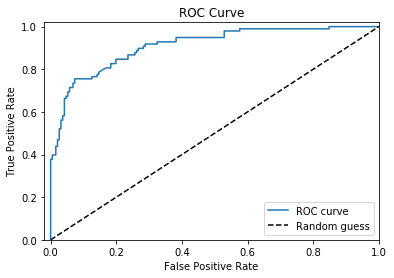

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
SVM_pred_prob = classifierSVM.predict_proba(tf_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, SVM_pred_prob)
#membuat plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

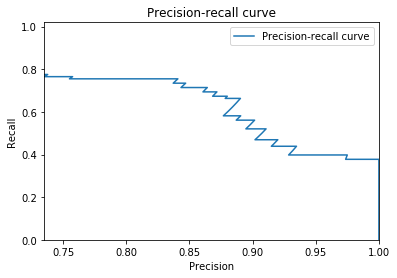

In [36]:
precision, recall, thresholds = precision_recall_curve(y_test, SVM_pred_prob)
#membuat plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.xlim([0.735, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="upper right")

In [37]:
print(average_precision_score(y_test, SVM_pred_prob))

0.867623959226403
